In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,Triceps,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Data Cleaning

In [ ]:
# Check for missing values
missing_values = df.isna().sum()  # to count missing values in each column
print(missing_values)

# Remove missing values
df.dropna(inplace=True)

# Reset index
df.reset_index(drop=True, inplace=True)  # this is done to make the numbering proper after removing the middle null values

Pregnancies                 0
Glucose                     0
BloodPressure               0
Triceps                     0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


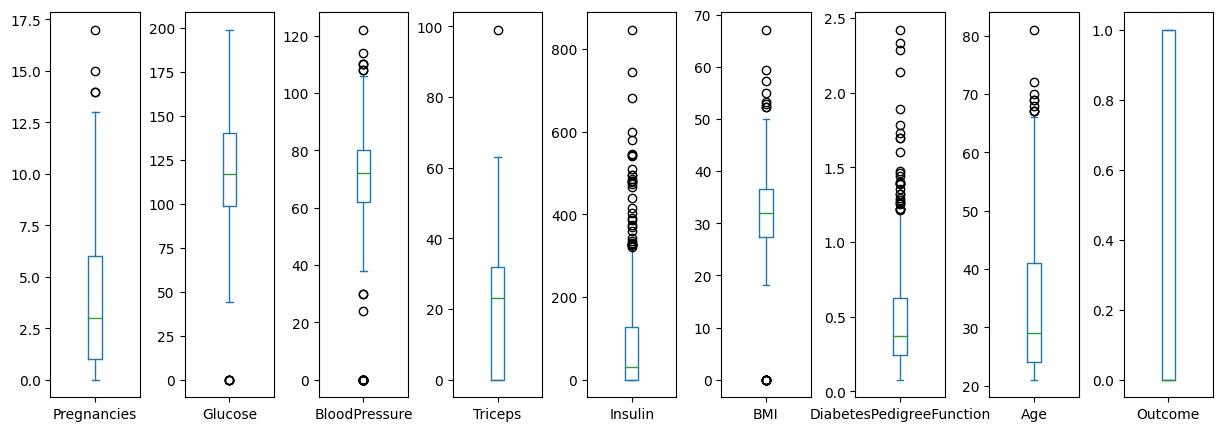

In [ ]:
df.plot(kind='box', figsize=(15,5), subplots=True)
# increase spacing between subplots
plt.subplots_adjust(wspace=0.5)
plt.show()

How many people below the age of 30 are diabetic in the dataset?

In [ ]:
result1 = df.query('Age < 30 & Outcome == 1')  # returns the rows having age less than 30
result1.head()
print("Number of people below the age of 30 diabetic in the dataset are = ",len(result1))

Number of people below the age of 30 diabetic in the dataset are =  84


How many women chose NOT to be pregnant while being a diabetic?

In [ ]:
result2 = df.query('Pregnancies == 0 & Outcome == 1')  # returns the rows with 0 pregnancies but are diabetic
result2.head()
print("Number of women who chose NOT to be pregnant while being diabetic = ", len(result2))

Number of women who chose NOT to be pregnant while being diabetic =  38


What is the greatest number of pregnancies a woman had while being a diabetic?

In [ ]:
result3 = df.sort_values(by='Pregnancies', ascending=False).query("Outcome == 1")  # returns dataframe with diabetic women sorted in
                                                                                   # descending orders by their pregnancy number
result3.head()

max_pregnancies = max(result3.Pregnancies)  # returns greatest number of pregnancies
print("Greatest number of pregnancies a women had while being a diabetic = ", max_pregnancies)

Greatest number of pregnancies a women had while being a diabetic =  17


How many people with a Diabetes pedigree function below 0.250 are diabetic?

In [ ]:
result4 = df.query('DiabetesPedigreeFunction < 0.250 & Outcome == 1')
result4.head()
print("Number of people with Diabetes pedigree function below 0.250 who are diabetic = ", len(result4))

Number of people with Diabetes pedigree function below 0.250 who are diabetic =  52


How many people with Insulin levels lesser than 200 are diabetic?

In [ ]:
result5 = df.query('Insulin < 200 & Outcome == 1')
result5.head()
print("Number of people with insulin levels lesser than 200 are diabetic = ", len(result5))

Number of people with insulin levels lesser than 200 are diabetic =  221


Overall, how many people in the dataset are diabetic and non-diabetic?



In [ ]:
result6 = df.query('Outcome == 1')
diabetic_count = len(result6)
result6 = df.query('Outcome == 0')
non_diabetic_count = len(result6)
print("Number of Diabetic People = ", diabetic_count)
print("Number of Non - Diabetic People = ", non_diabetic_count)

Number of Diabetic People =  268
Number of Non - Diabetic People =  500


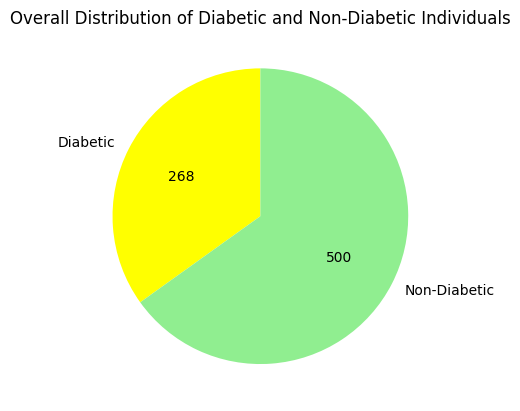

In [ ]:
# Visualization: Pie Chart
labels = ['Diabetic', 'Non-Diabetic']
sizes = [diabetic_count, non_diabetic_count]
colors = ['yellow', 'lightgreen']

# plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct=lambda p: f'{int(p * sum(sizes) / 100)}', colors=colors, startangle=90)
plt.title('Overall Distribution of Diabetic and Non-Diabetic Individuals')
plt.show()

What percentage of women who are less than 25 years old, have had at least one pregnancy?

In [ ]:
result7 = df.query('Age < 25 & Pregnancies >= 1')
percentage = (len(result7)/len(df))*100
print("Percentage of women less than 25 years old with 1 or more pregnancies = ", round(percentage, 2), "%")

Percentage of women less than 25 years old with 1 or more pregnancies =  21.35 %


How many women with a skin thickness of above 29 are diabetic?

In [ ]:
result8 = df.query('Triceps > 29 & Outcome == 1')
result8.head()
print("Number of women with a skin thickness or above 29mm who are diabetic = ", len(result8))

Number of women with a skin thickness or above 29mm who are diabetic =  117


How many people have a glucose level above 190?

In [ ]:
result9 = df.query('Glucose > 190')
print("Number of people with glucose level above 190 = ", len(result9))

Number of people with glucose level above 190 =  17


How many diabetics have a BMI of over 30?

In [ ]:
result10 = df.query('BMI > 30 & Outcome == 1')
print("Number of diabetics having BMI over 30 = ", len(result10))

Number of diabetics having BMI over 30 =  215


How many diabetics have a blood pressure of less than 80?

In [ ]:
result11 = df.query('BloodPressure < 80 & Outcome == 1')
print("Number of diabetics with blood pressure < 80 = ", len(result11))

Number of diabetics with blood pressure < 80 =  178


In [ ]:
len(df)

768